## Final

In [102]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [37]:
col_names = [
  "age",
  "class of worker",
  "detailed industry recode",
  "detailed occupation recode",
  "education",
  "wage per hour",
  "enroll in edu inst last wk",
  "marital stat",
  "major industry code",
  "major occupation code",
  "race",
  "hispanic origin",
  "sex",
  "member of a labor union",
  "reason for unemployment",
  "full or part time employment stat",
  "capital gains",
  "capital losses",
  "dividends from stocks",
  "tax filer stat",
  "region of previous residence",
  "state of previous residence",
  "detailed household and family stat",
  "detailed household summary in household",
  "instance weight",
  "migration code-change in msa",
  "migration code-change in reg",
  "migration code-move within reg",
  "live in this house 1 year ago",
  "migration prev res in sunbelt",
  "num persons worked for employer",
  "family members under 18",
  "country of birth father",
  "country of birth mother",
  "country of birth self",
  "citizenship",
  "own business or self employed",
  "fill inc questionnaire for veteran's admin",
  "veterans benefits",
  "weeks worked in year",
  "year",
  "income"]

In [72]:
def load_dataset(full_path):
    dataframe = pd.read_csv(full_path, names=col_names, na_values=' ?')
    dataframe = dataframe.dropna()
    X, y= dataframe.iloc[:, :-1], dataframe.iloc[:, -1]
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    y = LabelEncoder().fit_transform(y)
    return X, y, cat_ix, num_ix

In [58]:
def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [63]:
def get_models():
    models, names = list(), list()
    models.append(DecisionTreeClassifier())
    names.append("CART")
    # models.append(SVC(gamma='scale'))
    # names.append("SVM")
    # models.append(BaggingClassifier(n_estimators=100))
    # names.append("BAG")
    models.append(RandomForestClassifier(n_estimators=100))
    names.append("RF")
    models.append(GradientBoostingClassifier(n_estimators=100))
    names.append("GBM")
    return models, names

In [64]:
X, y, cat_ix, num_ix = load_dataset('/Users/rory.hurley/Documents/GitHub/uscb_classifier/data/raw/census_income_learn.csv')

In [65]:
models, names = get_models()

In [66]:
results = list()
for i in range(len(models)):
    steps = [
        ('c', OneHotEncoder(handle_unknown='ignore'), cat_ix),
        ('n', MinMaxScaler(), num_ix)
    ]
    ct = ColumnTransformer(steps)
    pipeline = Pipeline(
        steps=[
            ('t', ct),
            ('m', models[i])]
    )
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    print(f"{names[i]}: {np.mean(scores)} ({np.std(scores)})")

CART: 0.9348575633343845 (0.0014220665262330463)
RF: 0.9564175339009777 (0.00123056958912326)
GBM: 0.9576894775570273 (0.0014860539606990492)


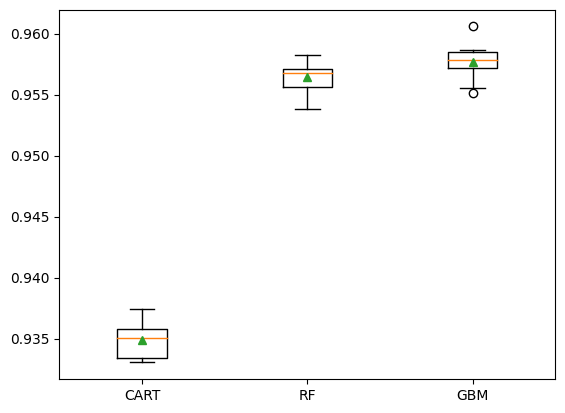

In [69]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## Predict Data

In [84]:
X, y, cat_ix, num_ix = load_dataset('/Users/rory.hurley/Documents/GitHub/uscb_classifier/data/raw/census_income_learn.csv')

In [85]:
X.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94


In [86]:
steps = [
    ('c', OneHotEncoder(handle_unknown='ignore'), cat_ix),
    ('n', MinMaxScaler(), num_ix)
]

ct = ColumnTransformer(steps)

pipeline = Pipeline(
    steps=[
        ('t', ct),
        ('m', GradientBoostingClassifier(n_estimators=100))]
)

In [87]:
pipeline.fit(X, y)

Pipeline(steps=[('t',
                 ColumnTransformer(transformers=[('c',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['class of worker', 'education', 'enroll in edu inst last wk',
       'marital stat', 'major industry code', 'major occupation code', 'race',
       'hispanic origin', 'sex', 'member of a labor union',
       'reason for unemployment', 'full or part time employment stat',
       'tax filer stat', 'region of previou...
       'fill inc questionnaire for veteran's admin'],
      dtype='object')),
                                                 ('n', MinMaxScaler(),
                                                  Index(['age', 'detailed industry recode', 'detailed occupation recode',
       'wage per hour', 'capital gains', 'capital losses',
       'dividends from stocks', 'instance weight',
       'num persons worked for employer', 'own business or self employed',
       'veterans benefits', 'weeks worked in year', 'year'],
      dtype='object'))])),
                ('m', GradientBoostingClassifier())])

In [88]:
X.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94


In [96]:
X, y, cat_ix, num_ix = load_dataset('/Users/rory.hurley/Documents/GitHub/uscb_classifier/data/raw/census_income_test.csv')

In [97]:
preds = pipeline.predict(X)

In [98]:
from collections import Counter

Counter(preds)

Counter({0: 45926, 1: 1465})

In [99]:
print(classification_report(y_true=y, y_pred=preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     44708
           1       0.74      0.41      0.53      2683

    accuracy                           0.96     47391
   macro avg       0.85      0.70      0.75     47391
weighted avg       0.95      0.96      0.95     47391



In [103]:
joblib.dump(pipeline, '../pipelines/pipeline.pkl')


['../pipelines/pipeline.pkl']